In [1]:
import numpy as np
# import cv2 as cv #opencv - for reading in images
# import os
import vanilla_frog as frg
import data_processing as dp
import storage as tst
import scipy.interpolate as intp
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
%matplotlib inline

In [2]:
# constants
c = 2.99e8 # speed of light in vac [m/s]
# factors for plotting, b/c im working in m and sec
h2th = 1.e-15 # Hz to THz
m2nm = 1.e9 # m to nm
s2fs = 1.e15 # s to fs

# Raw PHAROS pre-processing

In [41]:
# loading info
folder = './Raw PHAROS/' 
fname = 'raw_pharos.tif'
cali = {
    'calibration wavelength': 638.453e-9,
    'calibration pixel': 1025,
    'delay per pixel': .1e-15,
    'wavelength per pixel': .414e-9
}

In [42]:
# load in trace
(trace,d_arr,w_arr,f_arr) = tst.read_trace(folder,fname,cali)

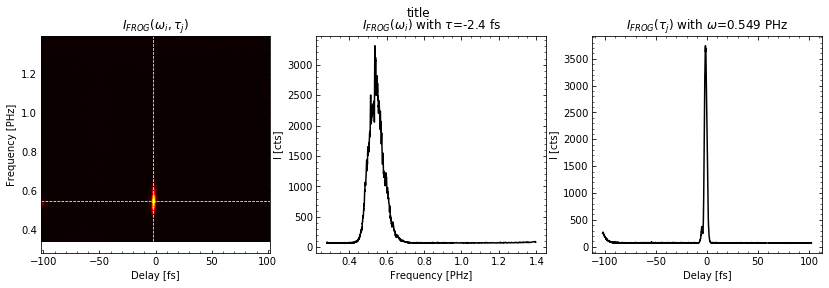

In [43]:
# plot after every step
tst.rough_plot(trace,d_arr,f_arr,chose_f=.55/h2th,chose_d=-2.3/s2fs)
# tst.nice_plot(trace,d_arr,-2.3/s2fs,f_arr,.55/h2th,title='Raw PHAROS Trace',fname='./Raw_PHAROS_output/rp_raw.png')

In [44]:
# make note of any weird values here
print(trace[492,157])

4095


In [45]:
# bkgnd removal
bnd_val = (10./s2fs,-20./s2fs,.4/h2th,.8/h2th)
trace = tst.avg_removal(trace,d_arr,f_arr,bnd_val,copy=False)

In [46]:
# do any other weird corrections here i guess
if (trace[492,157]>1000):
    print('mischief managed')
    trace[492,157] = 40 # number picked from nearby values after avg_removal was run
assert(trace.dtype==np.ushort)

mischief managed


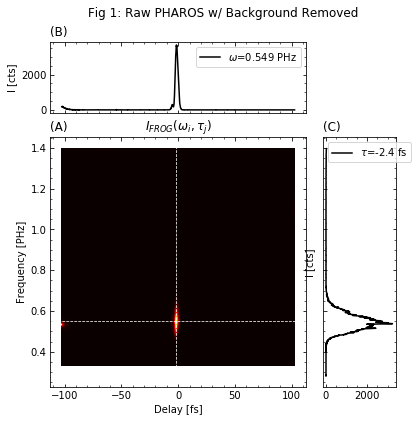

In [47]:
tst.nice_plot(trace,d_arr,-2.3/s2fs,f_arr,.55/h2th,fname='rp_bkg-rem_2048.png',title='Raw PHAROS w/ Background Removed')

In [48]:
# tst.rough_plot(trace,d_arr,f_arr,chose_f=.55/h2th,chose_d=-2.3/s2fs)
# # may also want contour before and after avg_removal

In [49]:
# sampling testing
N = 128
dt,df,M,dmax,fmax = tst.sr_FWHM(trace,d_arr,f_arr,N,diag=True)
print(dt*N/2*s2fs)
print(df*N/2*h2th)

max along t_curve: -1.6508060576453316
max along f_curve: 0.5383452600683419
time indices:  [ 994 1024]  time vals:  [-2.95144113  0.05002443]
freq indices:  [904 736 730 727]  freq vals:  [0.50803526 0.57615691 0.57892933 0.58032557]
Dt =  3.001465559355154 Df =  0.07043534386379019
M =  5.201959738633938 dt =  0.57698746437114 df =  0.013540155518828928
36.92719771975296
0.8665699532050514


In [50]:
# mid_d = 0.
# mid_f = .9/h2th
# save params below
folder = './Raw_PHAROS_output/'
fname = '128-bit-test'

In [51]:
(f_trace,fd_arr,ff_arr) = tst.man_snc(trace,d_arr,dmax,f_arr,fmax,N,dt,df,save=True,pad_trace=True,folder=folder,fname=fname) 

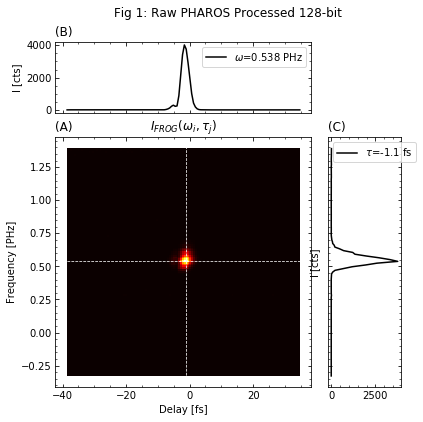

In [52]:
tst.nice_plot(f_trace,fd_arr,-1./s2fs,ff_arr,0.55/h2th,title='Raw PHAROS Processed 128-bit',fname='rp_proc_128.png')

# First Stage Pre-Processing

In [15]:
fold1 = './First Stage/'
fn1 = '2um_Merge_9.tif'
# same cali as raw pharos, only b/c its the same size

In [16]:
(t1,d1,w1,f1) = tst.read_trace(fold1,fn1,cali)

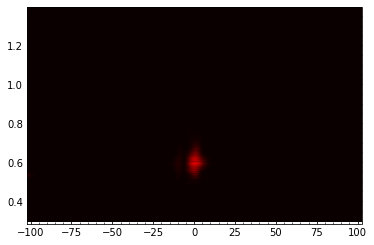

In [17]:
plt.pcolormesh(d1*s2fs,f1*h2th,t1,cmap='hot');

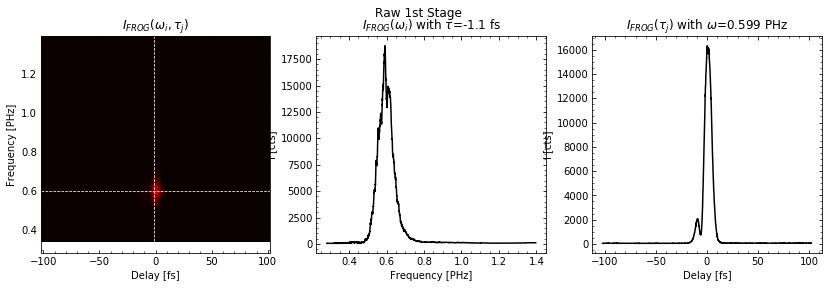

In [18]:
tst.rough_plot(t1,d1,f1,chose_d=-1./s2fs,chose_f=.6/h2th,title='Raw 1st Stage')
# tst.nice_plot(t1,d1,-1./s2fs,f1,.6/h2th,title='Raw 1st Stage Trace',fname='./first_stage_output/s1_raw.png')

In [19]:
# make note of weird values here
print(t1[492,157])

65535


In [20]:
bnd_val = (-15./s2fs,15./s2fs,.45/h2th,.75/h2th)
trc1 = tst.avg_removal(t1,d1,f1,bnd_val)

In [21]:
# weird point removal
if (trc1[492,157]>1000):
    print('mischief managed')
    trc1[492,157] = 40 # rand num i picked
assert(trace.dtype==np.ushort)

mischief managed


In [22]:
N = 128
(dt,df,M,dmax,fmax) = tst.sr_FWHM(trc1,d1,f1,N,diag=True)
print(dt*N/2*s2fs)
print(df*N/2*h2th)

max along t_curve: 0.7503663898387913
max along f_curve: 0.591742699929525
time indices:  [ 994 1072]  time vals:  [-2.95144113  4.85236932]
freq indices:  [791 613]  freq vals:  [0.55192836 0.63887663]
Dt =  7.803810454323399 Df =  0.08694827635339857
M =  9.31941881787607 dt =  0.8373709355517425 df =  0.009329795993996802
53.59173987531152
0.5971069436157953


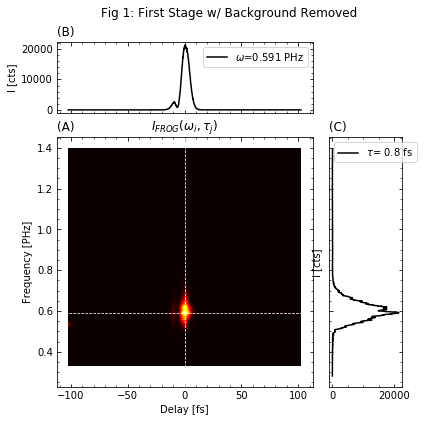

In [23]:
tst.nice_plot(trc1,d1,dmax,f1,fmax,fname='./first_stage_output/s1_bkg-rem_raw-size.png',title='First Stage w/ Background Removed')

In [24]:
folder = './first_stage_output/'
fname = '128-bit_test'

In [25]:
ftrc1,fd1,ff1 = tst.man_snc(trc1,d1,dmax,f1,fmax,N,dt,df,save=True,pad_trace=True,folder=folder,fname=fname)

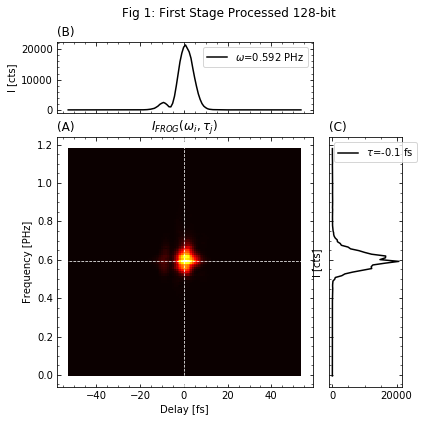

In [26]:
tst.nice_plot(ftrc1,fd1,0.,ff1,0.6/h2th,title='First Stage Processed 128-bit',fname='./first_stage_output/s1_proc_128bit.png')

# Second Stage Pre-Processing

In [27]:
fold2 = './Second Stage/'
fn2 = 'final.png'
c2 = {
    'calibration wavelength': 527.e-9,
    'calibration pixel': 1143,
    'delay per pixel': .17e-15,
    'wavelength per pixel': .09e-9
}

In [28]:
(t2,d2,w2,f2) = tst.read_trace(fold2,fn2,c2)

In [29]:
print(t2.shape,d2.shape,w2.shape)

(2138, 1542) (1542,) (2138,)


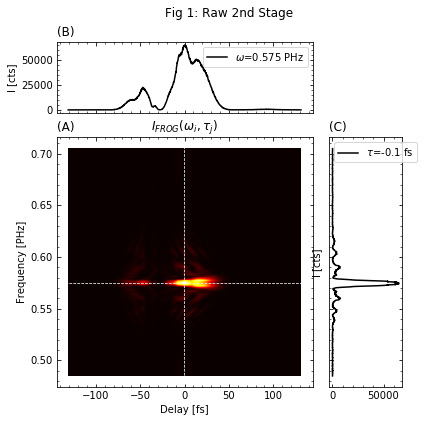

In [30]:
tst.nice_plot(t2,d2,0./s2fs,f2,.575/h2th,title='Raw 2nd Stage',fname='./second_stage_output/s2_raw.png')

In [31]:
# put weird vals here

In [32]:
bnd_val = (-80./s2fs,50./s2fs,.525/h2th,.63/h2th)
trc2 = tst.avg_removal(t2,d2,f2,bnd_val)

In [33]:
# wierd point removal

In [34]:
N = 128
(dt,df,M,dmax,fmax) = tst.sr_FWHM(trc2,d2,f2,N,diag=True)
print(dt*N/2*s2fs)
print(df*N/2*h2th)

max along t_curve: 0.5953861129136954
max along f_curve: 0.574972520076184
time indices:  [706 923]  time vals:  [-10.97211551  25.94182349]
freq indices:  [1097 1042]  freq vals:  [0.57180427 0.57727147]
Dt =  36.91393900064894 Df =  0.005467196463030501
M =  5.082560069771095 dt =  7.2628632999730485 df =  0.0010756776876179113
464.8232511982751
0.06884337200754632


time sampling is fine, but going to need to adjust b/c freq samp isnt very good

cant really use FWHM here anyway cuz this pulse cant rly be described with a FWHM

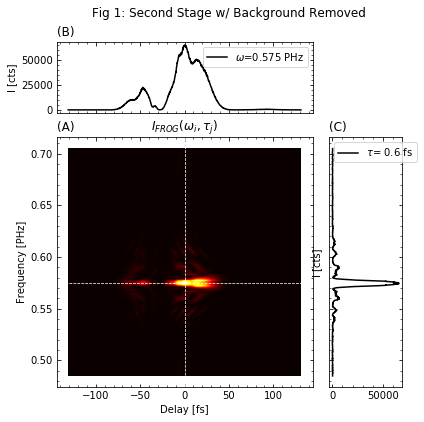

In [35]:
tst.nice_plot(trc2,d2,dmax,f2,fmax,title='Second Stage w/ Background Removed',fname='s2_bkg-rem_raw-size.png')

In [36]:
folder = './second_stage_output/'
fname = '128-bit'

In [37]:
ftrc2,fd2,ff2 = tst.man_snc(trc2,d2,dmax,f2,fmax,N,dt,df,save=True,pad_trace=True,folder=folder,fname=fname)

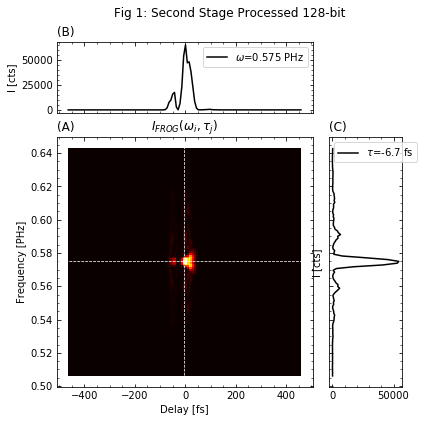

In [38]:
tst.nice_plot(ftrc2,fd2,dmax,ff2,0.575/h2th,title='Second Stage Processed 128-bit',fname='s2_proc_128bit.png')